# SLC4A1

SLC4A1 codes for Band 3 is the major glycoprotein of the erythrocyte membrane. Several diseases are associated with pathogenic variants in this gene.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release="v2025-01-16")
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using genophenocorr version 0.9.6.dev0


# SLC4A1
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SLC4A1.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service

gene_symbol = 'SLC4A1'
mane_tx_id = 'NM_000342.4'
mane_protein_id = "NP_000333.1" # band 3 anion transport protein
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.24") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Individuals Processed: 100%|██████████| 33/33 [00:00<00:00, 144.82 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
24,Distal renal tubular acidosis
23,Alkaline urine
18,Nephrocalcinosis
13,Impaired renal concentrating ability
13,Decreased serum bicarbonate concentration
12,Reticulocytosis
11,Hypokalemia
10,Nephrolithiasis
10,Hemolytic anemia
8,Increased red cell osmotic fragility


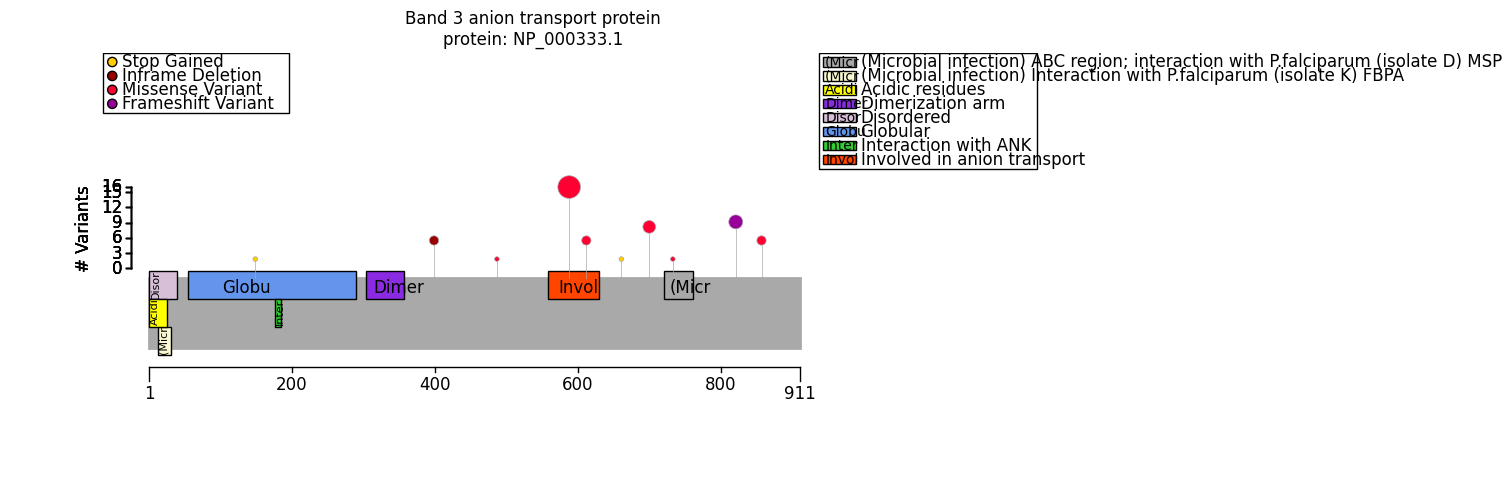

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

slc4a1_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
slc4a1_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.view import MtcStatsViewer
from gpsea.analysis.predicate import variant_key
from gpsea.analysis.clf import monoallelic_classifier

r589h = variant_key(key="17_44255707_44255707_C_T") # c.1766G>A; p.Arg589His

r589h_clf = monoallelic_classifier(
    a_predicate=r589h, 
    b_predicate=~r589h, 
    a_label="r149w",
    b_label="other",
)

r589h_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r589h_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(r589h_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,2
"Skipping ""general"" level terms",51
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),78


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=r589h_result)

Allele group,r149w,other,Corrected p values,p values
Nephrolithiasis [HP:0000787],9/14 (64%),1/4 (25%),1.0,0.274510
Nephrocalcinosis [HP:0000121],9/14 (64%),4/4 (100%),1.0,0.277778
Hypokalemia [HP:0002900],4/14 (29%),2/4 (50%),1.0,0.568627
Abnormal renal morphology [HP:0012210],11/11 (100%),4/4 (100%),1.0,1.000000
Renal tubular acidosis [HP:0001947],13/13 (100%),4/4 (100%),1.0,1.000000
Metabolic acidosis [HP:0001942],13/13 (100%),4/4 (100%),1.0,1.000000
Acidosis [HP:0001941],13/13 (100%),4/4 (100%),1.0,1.000000
Distal renal tubular acidosis [HP:0008341],13/14 (93%),4/4 (100%),1.0,1.000000
Alkaline urine [HP:0032944],14/14 (100%),3/3 (100%),1.0,1.000000
Abnormality of the kidney [HP:0000077],14/14 (100%),4/4 (100%),1.0,1.000000


# Summary

In [9]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
    GPAnalysisResultSummary.from_multi(
        result=r589h_result,
    ),
)

caption = "No statistically significant results identified."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [10]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
r149w,other,14,0


In [11]:
summarizer.process_latex(report=report, protein_fig=slc4a1_fig)

Figure saved to ../../supplement/img/SLC4A1_protein_diagram-draft.pdf
Output to ../../supplement/tex/SLC4A1_summary_draft.tex
